In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import os
os.chdir('../python/')
import subprocess

out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)

import sys
sys.path.append('../python/')
import gropt

from helper_utils import *

%matplotlib inline

In [2]:
print(out.stdout.decode('utf-8'))

running build_ext
building 'gropt' extension
C:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\BIN\x86_amd64\cl.exe /c /nologo /Ox /W3 /GL /DNDEBUG /MD -I. -I../src -IC:\Users\Mike\Anaconda3\lib\site-packages\numpy\core\include -IC:\Users\Mike\Anaconda3\include -IC:\Users\Mike\Anaconda3\include "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\INCLUDE" "-IC:\Program Files (x86)\Microsoft Visual Studio 14.0\VC\ATLMFC\INCLUDE" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.10240.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\NETFXSDK\4.6.1\include\um" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.10240.0\shared" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.10240.0\um" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.10240.0\winrt" /Tcgropt.c /Fobuild\temp.win-amd64-3.7\Release\gropt.obj
gropt.c
c:\users\mike\anaconda3\lib\site-packages\numpy\core\include\numpy\npy_1_7_deprecated_api.h(14) : Warning Msg: Using deprecated NumPy API, disable it 

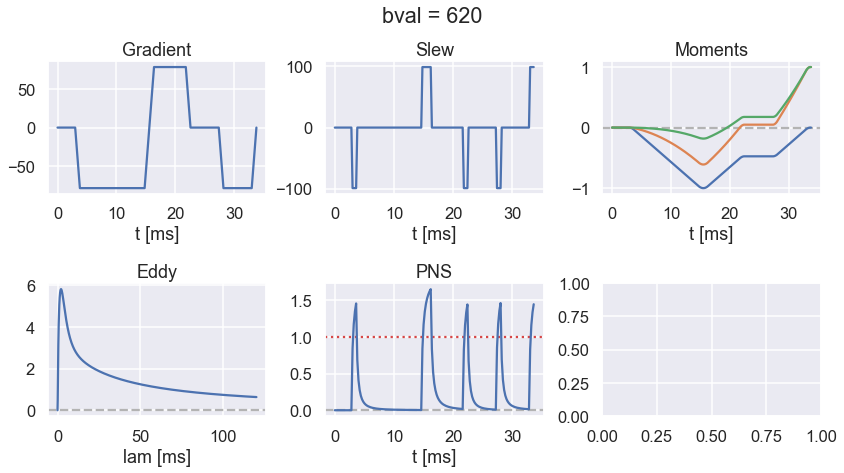

In [3]:
params = {}
params['mode'] = 'diff_bval'
params['gmax']  = 0.08
params['smax']  = 100.0
params['MMT']  = 0
params['TE']  = 50.0
params['T_readout']  = 16.0
params['T_90']  = 3
params['T_180']  = 5
params['dt']  = 200e-6

G, dd = gropt.gropt(params, verbose=1)
plot_waveform(G, params)

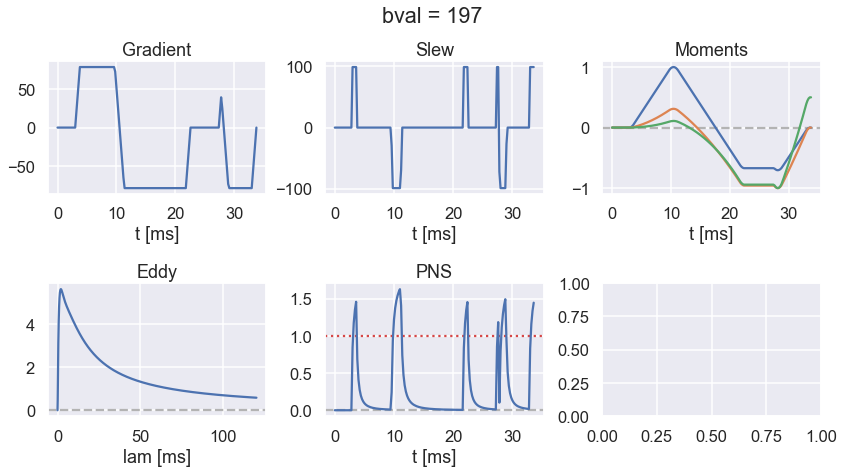

In [4]:
params = {}
params['mode'] = 'diff_bval'
params['gmax']  = 0.08
params['smax']  = 100.0
params['MMT']  = 1
params['TE']  = 50.0
params['T_readout']  = 16.0
params['T_90']  = 3
params['T_180']  = 5
params['dt']  = 200e-6

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)

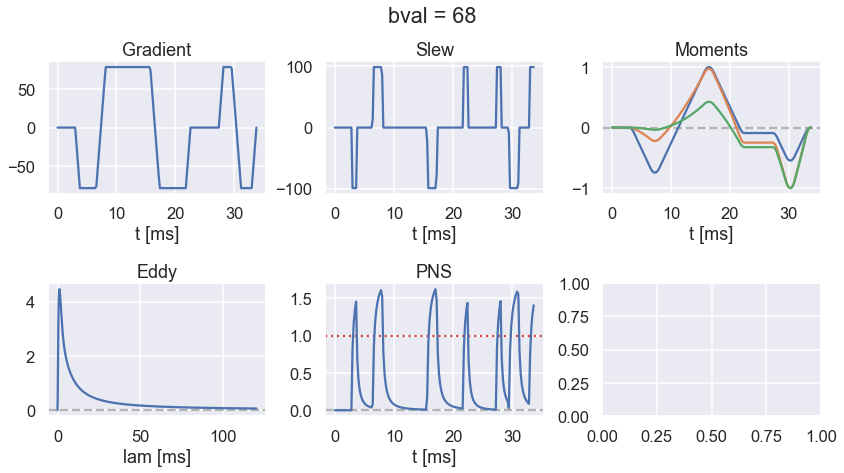

In [5]:
params = {}
params['mode'] = 'diff_bval'
params['gmax']  = 0.08
params['smax']  = 100.0
params['MMT']  = 2
params['TE']  = 50.0
params['T_readout']  = 16.0
params['T_90']  = 3
params['T_180']  = 5
params['dt']  = 200e-6

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)

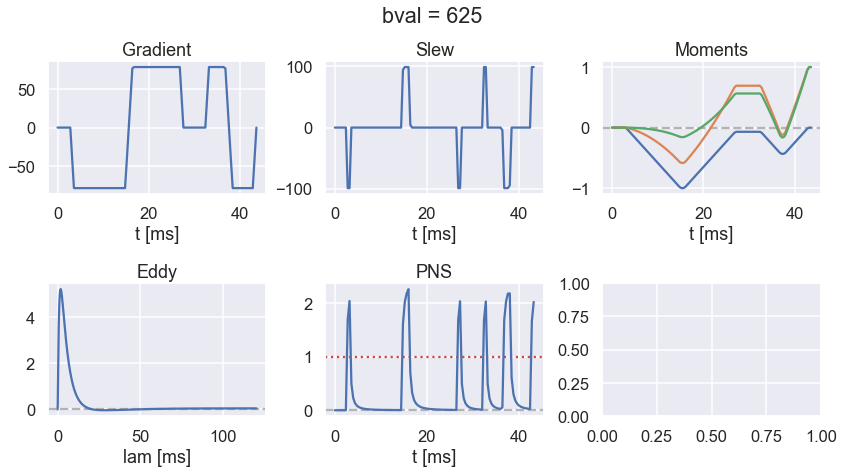

In [6]:
params = {}
params['mode'] = 'diff_bval'
params['gmax']  = 0.08
params['smax']  = 100.0
params['MMT']  = 0
params['TE']  = 60.0
params['T_readout']  = 16.0
params['T_90']  = 3
params['T_180']  = 5
params['dt']  = 400e-6
params['eddy_params']  = [[50.0, 0.0, 1.0e-4, 0.0]]

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)

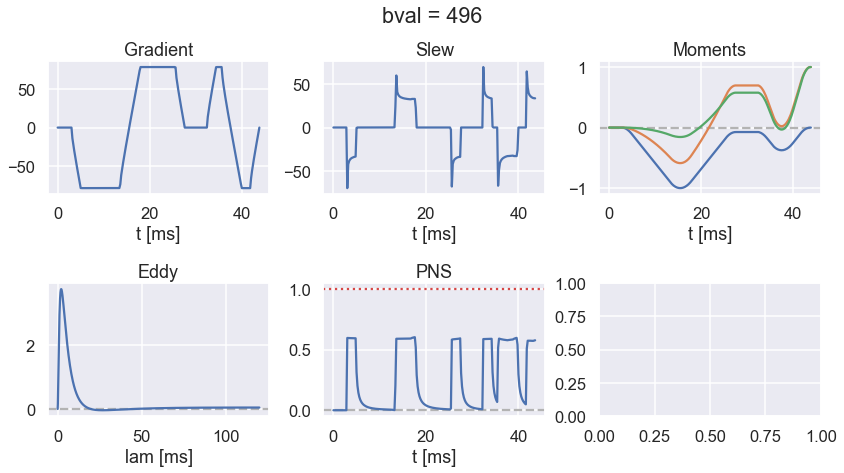

In [8]:
params = {}
params['mode'] = 'diff_bval'
params['gmax']  = 0.08
params['smax']  = 200.0
params['MMT']  = 0
params['TE']  = 60.0
params['T_readout']  = 16.0
params['T_90']  = 3
params['T_180']  = 5
params['dt']  = 200e-6
params['pns_thresh']  = 0.6
params['eddy_params']  = [[50.0, 0.0, 1.0e-4, 0.0]]

G, dd = gropt.gropt(params, verbose=1)

plot_waveform(G, params)

Testing TE = 117.000 75.500 54.750 44.375 49.562 52.156 53.453 54.102 53.777 53.939 54.021 54.061 Final TE = 54.102 ms


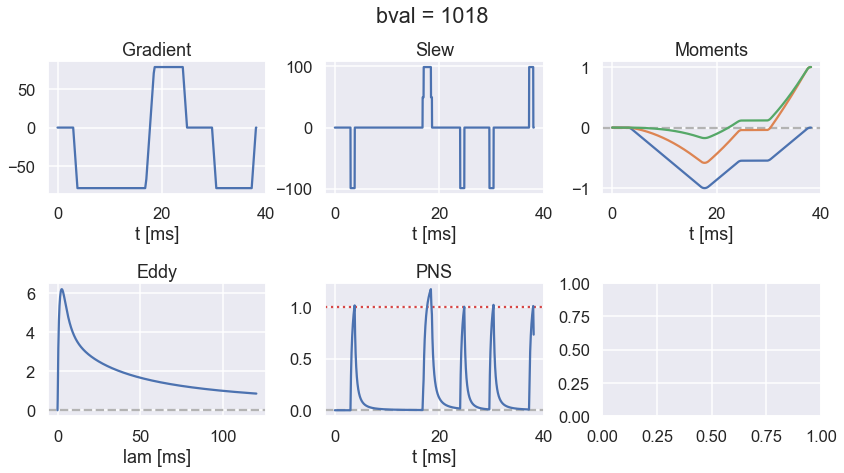

In [9]:
params = {}
params['mode'] = 'diff_bval'
params['gmax']  = 0.08
params['smax']  = 100.0
params['MMT']  = 0
params['TE']  = 50.0
params['T_readout']  = 16.0
params['T_90']  = 3
params['T_180']  = 5
params['dt']  = 200e-6
params['dt_out']  = 10e-6

# G, dd = gropt.gropt(params, verbose=1)

# plot_waveform(G, params)

G_min, T_min = get_min_TE(params, verbose = 1)

plot_waveform(G_min, params)

120


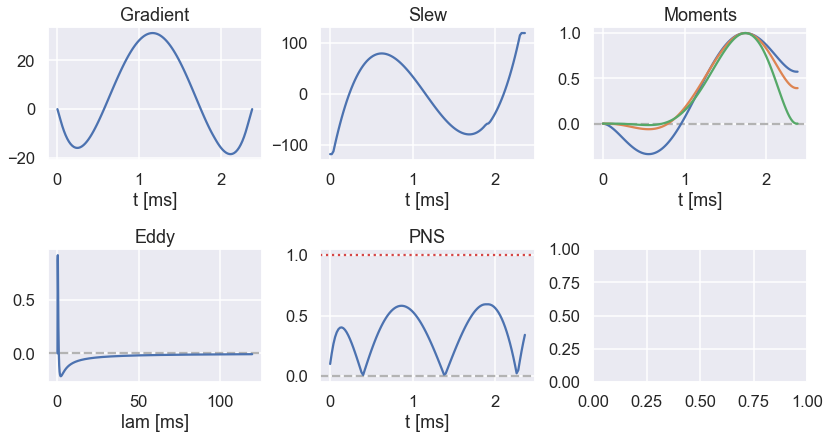

In [10]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.08
params['smax']  = 200.0
params['moment_params']  = [[0, 0, 0, -1, -1, 10, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 10, 1.0e-3])
params['moment_params'].append([0, 2, 0, -1, -1, 0, 1.0e-3])
dt = 20e-6
params['dt']  = dt
params['pns_thresh'] = 0.6
params['TE'] = 2.40
params['slew_reg'] = 0.6

G, dd = gropt.gropt(params, verbose=1)

# G, T_min = get_min_TE(params, max_TE = 20)
plot_waveform(G, params)

print(G.size)

120


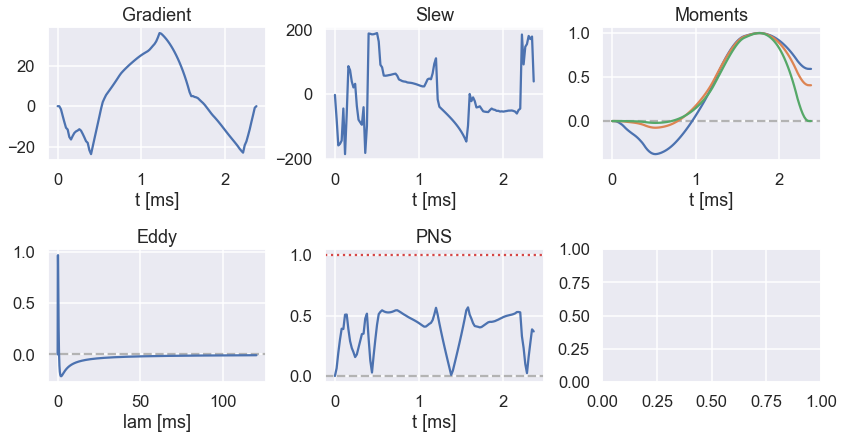

In [11]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.08
params['smax']  = 200.0
params['moment_params']  = [[0, 0, 0, -1, -1, 10, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 10, 1.0e-3])
params['moment_params'].append([0, 2, 0, -1, -1, 0, 1.0e-3])
dt = 20e-6
params['dt']  = dt
params['pns_thresh'] = 0.6
params['TE'] = 2.40
params['slew_reg'] = 1.0

G, dd = gropt.gropt(params, verbose=1)

# G, T_min = get_min_TE(params, max_TE = 20)
plot_waveform(G, params)

print(G.size)

56


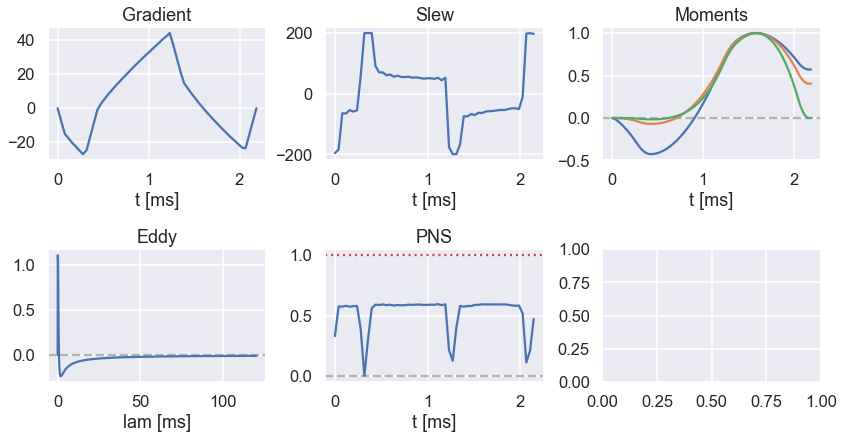

In [12]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.08
params['smax']  = 200.0
params['moment_params']  = [[0, 0, 0, -1, -1, 10, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 10, 1.0e-3])
params['moment_params'].append([0, 2, 0, -1, -1, 0, 1.0e-3])
params['dt']  = 40e-6
params['pns_thresh'] = 0.6
params['TE'] = 2.40
params['slew_reg'] = 1.0

# G, dd = gropt.gropt(params, verbose=1)

G, T_min = get_min_TE(params, max_TE = 4)
plot_waveform(G, params)

print(G.size)

In [ ]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.08
params['smax']  = 200.0
params['moment_params']  = [[0, 0, 0, -1, -1, 10, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 10, 1.0e-3])
params['moment_params'].append([0, 2, 0, -1, -1, 0, 1.0e-3])
params['dt']  = 40e-6
params['pns_thresh'] = 0.6
params['TE'] = 2.4
params['slew_reg'] = 1.0

# G, dd = gropt.gropt(params, verbose=1)

G, T_min = get_min_TE(params, max_TE = 5)
plot_waveform(G, params)

print(G.size)

110


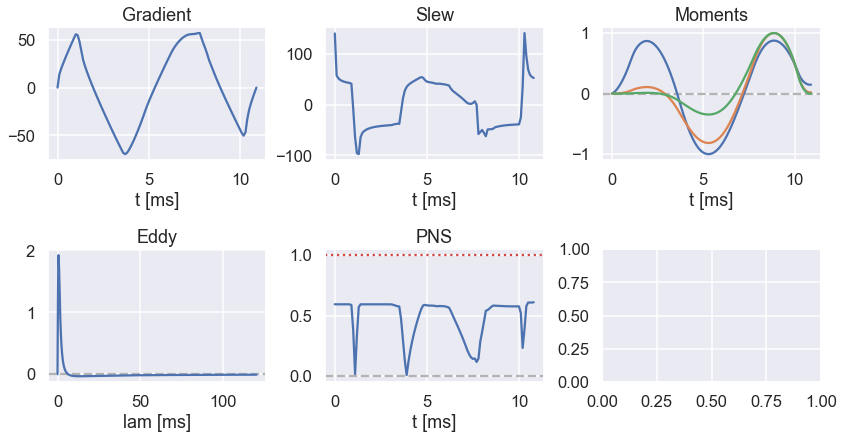

In [32]:
params = {}
params['mode'] = 'free'
params['gmax']  = 0.08
params['smax']  = 200.0
params['moment_params']  = [[0, 0, 0, -1, -1, 10, 1.0e-3]]
params['moment_params'].append([0, 1, 0, -1, -1, 10, 1.0e-3])
params['moment_params'].append([0, 2, 0, -1, -1, 0, 1.0e-3])
params['dt']  = 100e-6
params['pns_thresh'] = 0.6
params['TE'] = 11
params['slew_reg'] = 0.9
params['eddy_params']  = [[7.0, 0.0, 1.0e-4, 0.0]]

G, dd = gropt.gropt(params, verbose=1)

# G, T_min = get_min_TE(params, max_TE = 5)
plot_waveform(G, params)

print(G.size)